## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.075479 -0.711997 -1.534524 -1.720891 -1.660696 -1.684726
1  0.947616  0.233224 -0.913937  1.263102 -0.292552  1.390555
2  0.160913  0.811687  1.139036  1.264988  0.050561  1.681247
3  1.080268 -0.287332 -0.349402 -0.906112  0.234419 -0.095496
4 -0.912978 -1.505034 -0.781983 -0.036528 -1.680678 -1.531470


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9935532	total: 58.2ms	remaining: 58.1s


1:	learn: 0.9849669	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9750762	total: 60.2ms	remaining: 20s
3:	learn: 0.9650585	total: 60.6ms	remaining: 15.1s
4:	learn: 0.9575877	total: 61.3ms	remaining: 12.2s
5:	learn: 0.9489549	total: 61.7ms	remaining: 10.2s
6:	learn: 0.9384512	total: 62.1ms	remaining: 8.81s
7:	learn: 0.9288750	total: 62.5ms	remaining: 7.75s
8:	learn: 0.9202135	total: 63ms	remaining: 6.94s
9:	learn: 0.9106169	total: 63.4ms	remaining: 6.28s
10:	learn: 0.9013832	total: 64ms	remaining: 5.76s
11:	learn: 0.8912053	total: 64.8ms	remaining: 5.34s
12:	learn: 0.8813828	total: 65.4ms	remaining: 4.96s
13:	learn: 0.8728634	total: 66ms	remaining: 4.65s
14:	learn: 0.8666754	total: 66.8ms	remaining: 4.38s
15:	learn: 0.8582020	total: 67.3ms	remaining: 4.14s
16:	learn: 0.8503396	total: 67.9ms	remaining: 3.93s
17:	learn: 0.8427049	total: 68.3ms	remaining: 3.73s
18:	learn: 0.8351875	total: 68.8ms	remaining: 3.55s
19:	learn: 0.8267243	total: 69.2ms	remaining: 3.39s
20:	learn: 0.8178938	total: 6

261:	learn: 0.1359350	total: 186ms	remaining: 523ms
262:	learn: 0.1353326	total: 186ms	remaining: 522ms
263:	learn: 0.1344515	total: 187ms	remaining: 521ms
264:	learn: 0.1333582	total: 187ms	remaining: 519ms
265:	learn: 0.1324062	total: 187ms	remaining: 517ms
266:	learn: 0.1315550	total: 188ms	remaining: 516ms
267:	learn: 0.1305668	total: 188ms	remaining: 514ms
268:	learn: 0.1295647	total: 189ms	remaining: 513ms
269:	learn: 0.1288414	total: 189ms	remaining: 512ms
270:	learn: 0.1280646	total: 190ms	remaining: 510ms
271:	learn: 0.1271608	total: 190ms	remaining: 509ms
272:	learn: 0.1264405	total: 191ms	remaining: 508ms
273:	learn: 0.1257158	total: 191ms	remaining: 507ms
274:	learn: 0.1249908	total: 192ms	remaining: 505ms
275:	learn: 0.1242628	total: 192ms	remaining: 504ms
276:	learn: 0.1235176	total: 193ms	remaining: 503ms
277:	learn: 0.1228796	total: 193ms	remaining: 501ms
278:	learn: 0.1220672	total: 194ms	remaining: 500ms
279:	learn: 0.1212958	total: 194ms	remaining: 499ms
280:	learn: 

372:	learn: 0.0683959	total: 241ms	remaining: 404ms
373:	learn: 0.0681011	total: 241ms	remaining: 404ms
374:	learn: 0.0678590	total: 242ms	remaining: 403ms
375:	learn: 0.0673906	total: 242ms	remaining: 402ms
376:	learn: 0.0671022	total: 242ms	remaining: 400ms
377:	learn: 0.0668340	total: 243ms	remaining: 399ms
378:	learn: 0.0663137	total: 243ms	remaining: 399ms
379:	learn: 0.0659666	total: 244ms	remaining: 398ms
380:	learn: 0.0655303	total: 244ms	remaining: 397ms
381:	learn: 0.0651920	total: 245ms	remaining: 396ms
382:	learn: 0.0647697	total: 245ms	remaining: 395ms
383:	learn: 0.0644400	total: 246ms	remaining: 394ms
384:	learn: 0.0640094	total: 246ms	remaining: 393ms
385:	learn: 0.0635828	total: 247ms	remaining: 394ms
386:	learn: 0.0631715	total: 248ms	remaining: 393ms
387:	learn: 0.0627498	total: 248ms	remaining: 392ms
388:	learn: 0.0624029	total: 256ms	remaining: 401ms
389:	learn: 0.0620637	total: 256ms	remaining: 400ms
390:	learn: 0.0616020	total: 256ms	remaining: 399ms
391:	learn: 

563:	learn: 0.0261522	total: 353ms	remaining: 273ms
564:	learn: 0.0260247	total: 354ms	remaining: 272ms
565:	learn: 0.0259792	total: 355ms	remaining: 272ms
566:	learn: 0.0259194	total: 355ms	remaining: 271ms
567:	learn: 0.0258784	total: 356ms	remaining: 271ms
568:	learn: 0.0257539	total: 356ms	remaining: 270ms
569:	learn: 0.0257102	total: 357ms	remaining: 269ms
570:	learn: 0.0256705	total: 357ms	remaining: 268ms
571:	learn: 0.0255422	total: 358ms	remaining: 268ms
572:	learn: 0.0254792	total: 358ms	remaining: 267ms
573:	learn: 0.0254181	total: 359ms	remaining: 266ms
574:	learn: 0.0253154	total: 359ms	remaining: 266ms
575:	learn: 0.0252738	total: 360ms	remaining: 265ms
576:	learn: 0.0252167	total: 360ms	remaining: 264ms
577:	learn: 0.0251793	total: 361ms	remaining: 263ms
578:	learn: 0.0250511	total: 361ms	remaining: 262ms
579:	learn: 0.0249930	total: 361ms	remaining: 262ms
580:	learn: 0.0249533	total: 362ms	remaining: 261ms
581:	learn: 0.0249142	total: 362ms	remaining: 260ms
582:	learn: 

671:	learn: 0.0191040	total: 407ms	remaining: 199ms
672:	learn: 0.0190351	total: 408ms	remaining: 198ms
673:	learn: 0.0190191	total: 409ms	remaining: 198ms
674:	learn: 0.0189578	total: 409ms	remaining: 197ms
675:	learn: 0.0189420	total: 409ms	remaining: 196ms
676:	learn: 0.0188757	total: 410ms	remaining: 195ms
677:	learn: 0.0187742	total: 410ms	remaining: 195ms
678:	learn: 0.0187143	total: 411ms	remaining: 194ms
679:	learn: 0.0186177	total: 411ms	remaining: 193ms
680:	learn: 0.0186022	total: 412ms	remaining: 193ms
681:	learn: 0.0185868	total: 412ms	remaining: 192ms
682:	learn: 0.0185320	total: 413ms	remaining: 192ms
683:	learn: 0.0185074	total: 413ms	remaining: 191ms
684:	learn: 0.0184924	total: 414ms	remaining: 190ms
685:	learn: 0.0184522	total: 414ms	remaining: 190ms
686:	learn: 0.0183852	total: 415ms	remaining: 189ms
687:	learn: 0.0182849	total: 416ms	remaining: 189ms
688:	learn: 0.0182455	total: 417ms	remaining: 188ms
689:	learn: 0.0182003	total: 417ms	remaining: 187ms
690:	learn: 

832:	learn: 0.0119553	total: 485ms	remaining: 97.3ms
833:	learn: 0.0119365	total: 486ms	remaining: 96.7ms
834:	learn: 0.0119292	total: 487ms	remaining: 96.2ms
835:	learn: 0.0118738	total: 487ms	remaining: 95.6ms
836:	learn: 0.0118171	total: 488ms	remaining: 95ms
837:	learn: 0.0118100	total: 488ms	remaining: 94.4ms
838:	learn: 0.0118030	total: 489ms	remaining: 93.8ms
839:	learn: 0.0117847	total: 489ms	remaining: 93.2ms
840:	learn: 0.0117777	total: 490ms	remaining: 92.6ms
841:	learn: 0.0117224	total: 490ms	remaining: 92ms
842:	learn: 0.0117045	total: 491ms	remaining: 91.4ms
843:	learn: 0.0116976	total: 491ms	remaining: 90.8ms
844:	learn: 0.0116785	total: 492ms	remaining: 90.2ms
845:	learn: 0.0116246	total: 492ms	remaining: 89.6ms
846:	learn: 0.0116072	total: 493ms	remaining: 89ms
847:	learn: 0.0116004	total: 493ms	remaining: 88.4ms
848:	learn: 0.0115833	total: 494ms	remaining: 87.9ms
849:	learn: 0.0115298	total: 494ms	remaining: 87.2ms
850:	learn: 0.0115230	total: 495ms	remaining: 86.6ms

938:	learn: 0.0093371	total: 539ms	remaining: 35ms
939:	learn: 0.0093093	total: 540ms	remaining: 34.5ms
940:	learn: 0.0092906	total: 541ms	remaining: 33.9ms
941:	learn: 0.0092513	total: 541ms	remaining: 33.3ms
942:	learn: 0.0092467	total: 542ms	remaining: 32.7ms
943:	learn: 0.0092196	total: 542ms	remaining: 32.2ms
944:	learn: 0.0091752	total: 544ms	remaining: 31.7ms
945:	learn: 0.0091469	total: 545ms	remaining: 31.1ms
946:	learn: 0.0091204	total: 546ms	remaining: 30.5ms
947:	learn: 0.0090774	total: 546ms	remaining: 30ms
948:	learn: 0.0090355	total: 547ms	remaining: 29.4ms
949:	learn: 0.0089949	total: 547ms	remaining: 28.8ms
950:	learn: 0.0089674	total: 548ms	remaining: 28.2ms
951:	learn: 0.0089415	total: 548ms	remaining: 27.6ms
952:	learn: 0.0089021	total: 549ms	remaining: 27.1ms
953:	learn: 0.0088638	total: 549ms	remaining: 26.5ms
954:	learn: 0.0088369	total: 549ms	remaining: 25.9ms
955:	learn: 0.0087997	total: 550ms	remaining: 25.3ms
956:	learn: 0.0087680	total: 550ms	remaining: 24.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

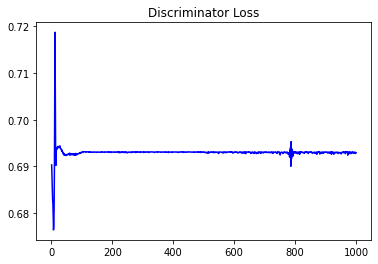

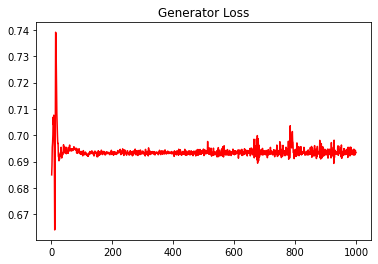

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1580934598143447


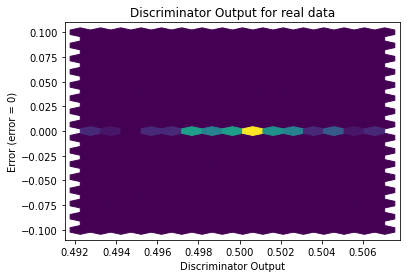

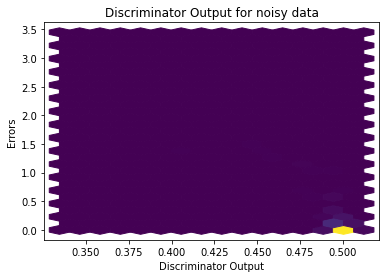

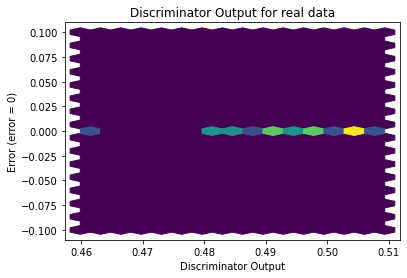

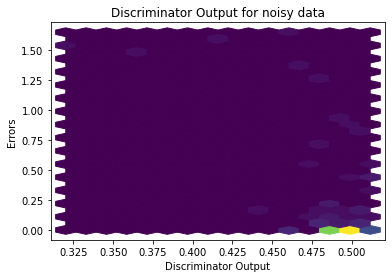

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


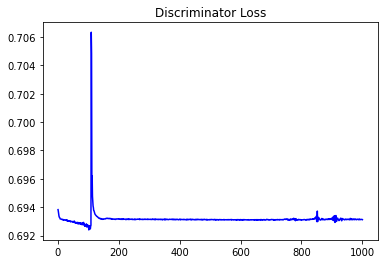

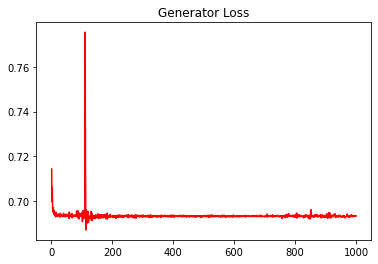

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1798429220811058


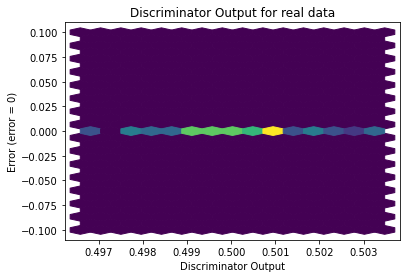

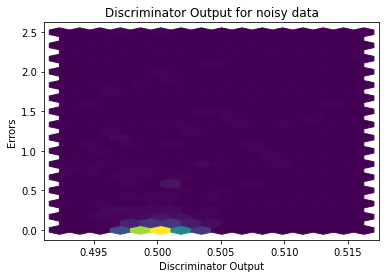

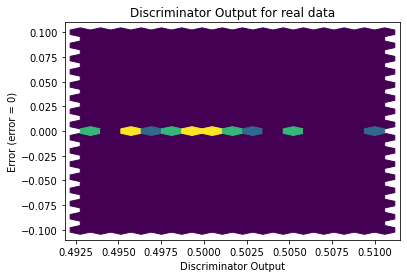

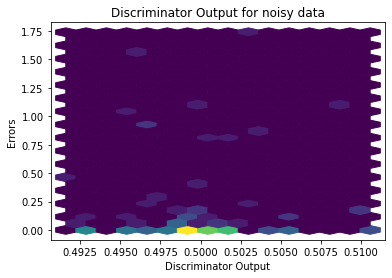

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0129]], requires_grad=True)
